In [1]:
import numpy as np
import seaborn as sns #визуализация ... связано с pandas, надстройка над plt
import matplotlib.pyplot as plt
import pandas as pd # основная работа с df

from sklearn import tree

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

In [ ]:
ttn = sns.load_dataset("titanic") #pd.read_csv("titanic.csv")
ttn.describe
ttn.dtypes.value_counts()

object      5
int64       4
float64     2
bool        2
category    1
category    1
dtype: int64

In [ ]:
# Студенты для курса Степика, фильтрация данных
stud = pd.read_csv("https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv")
stud

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
freere_lunch = stud[stud.lunch == 'free/reduced']
standart_lunch = stud[stud.lunch == 'standard']
freere_lunch.shape[0] / stud.shape[0]

0.355

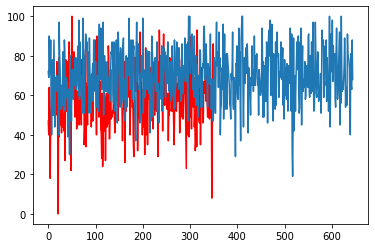

In [ ]:
plt.plot(list(range(0,355)),list(freere_lunch['math score']),"r")
plt.plot(list(range(0,645)),list(standart_lunch['math score']))

In [ ]:
import statistics # variance = дисперсия (выборочная), mean = среднее значение

print("Дисперсия мат скор: урезанные обеды / стандарт",statistics.variance(freere_lunch['math score']), statistics.variance(standart_lunch['math score']))
print("Дисперсия чит скор: урезанные обеды / стандарт",statistics.variance(freere_lunch['reading score']), statistics.variance(standart_lunch['reading score']))
print("Дисперсия писат скор: урезанные обеды / стандарт",statistics.variance(freere_lunch['writing score']), statistics.variance(standart_lunch['writing score']))

Дисперсия мат скор: урезанные обеды / стандарт 229.82426991326489 186.41808946025327
Дисперсия чит скор: урезанные обеды / стандарт 221.87113869658629 191.28556020992826
Дисперсия писат скор: урезанные обеды / стандарт 238.20288056019734 205.62088689874332


In [ ]:
print("Среднее мат скор: урезанные обеды / стандарт",statistics.mean(freere_lunch['math score']), statistics.mean(standart_lunch['math score']))
print("Среднее чит скор: урезанные обеды / стандарт",statistics.mean(freere_lunch['reading score']), statistics.mean(standart_lunch['reading score']))
print("Среднее писат скор: урезанные обеды / стандарт",statistics.mean(freere_lunch['writing score']), statistics.mean(standart_lunch['writing score']))

Среднее мат скор: урезанные обеды / стандарт 58.92112676056338 70.03410852713178
Среднее чит скор: урезанные обеды / стандарт 64.65352112676057 71.65426356589147
Среднее писат скор: урезанные обеды / стандарт 63.02253521126761 70.8232558139535


In [ ]:
stud = stud.rename(columns = {'parental level of education':'parental_level_of_education',
                              'test preparation course':'test_preparation_course',
                              'math score':'math_score', 'reading score':'reading_score', 
                              'writing score':'writing_score'})
read_mean = statistics.mean(stud.reading_score)
stud.query("gender == 'female' & reading_score > @read_mean").value_counts()

gender  race/ethnicity  parental_level_of_education  lunch         test_preparation_course  math_score  reading_score  writing_score
female  group E         some high school             standard      none                     77          79             80               1
        group C         bachelor's degree            free/reduced  completed                74          86             89               1
                        associate's degree           standard      none                     85          84             82               1
                                                                                                        89             95               1
                                                                                            91          86             84               1
                                                                                                                                       ..
        group D         high school    

In [ ]:
numbers = ['a','b','c','d','e',5]
numbers[0:5] = [1,2,3,4,5]
# numbers = [1, 2, 3, 4, 5, 5]
str = 'abcdef'
# str[0:2] = 'kk' - TypeError: 'str' object does not support item assignment
lk = []
#lk[0] = 1 IndexError: list assignment index out of range
lk.append(5)
lk.append([1,2,3])
lk.extend([5,6,7])
del lk[1:]
" ".join(["Z"," yyy"])
"Z ijnj oji".split('ij')
"1     6".split(" ")

['1', '', '', '', '', '6']

# Датасет героев игры Dota2, число ног

In [ ]:
dota = pd.read_csv("https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv")
dota

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
...,...,...,...,...,...,...,...,...
112,112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"['Carry', 'Escape', 'Disabler', 'Initiator']"
113,113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
114,114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc..."
115,115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"['Support', 'Nuker', 'Disabler', 'Escape']"


In [ ]:
dota.groupby('legs').name.nunique()

legs
0    11
2    95
4     7
6     3
8     1
Name: name, dtype: int64

In [ ]:
dota.groupby(['attack_type','primary_attr']).id.nunique()

attack_type  primary_attr
Melee        agi             19
             int              2
             str             35
Ranged       agi             18
             int             40
             str              3
Name: id, dtype: int64

In [ ]:
dota.groupby('attack_type').mean()

,Unnamed: 0,id,legs
attack_type,,,
Melee,62.375000,64.446429,2.214286
Ranged,53.983607,55.918033,1.967213


# Датасет бухгалтерии, средний заработок

In [ ]:
salary = pd.read_csv("https://stepik.org/media/attachments/course/4852/accountancy.csv")
salary.head(10)

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184
5,5,Loopa,F,232
6,6,Loopa,B,249
7,7,Pupa,F,195
8,8,Pupa,A,115
9,9,Pupa,E,65


In [ ]:
salary.groupby(["Executor","Type"]).Salary.mean()

Executor  Type
Loopa     A        58.000000
          B       145.166667
          C       154.333333
          D       137.714286
          E       164.000000
          F       238.000000
Pupa      A       160.833333
          B        77.000000
          C        74.500000
          D       146.500000
          E       131.200000
          F       136.250000
Name: Salary, dtype: float64

# Бактерии

In [ ]:
bact = pd.read_csv("http://stepik.org/media/attachments/course/4852/algae.csv")
bact

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
5,Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
6,Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
7,Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
8,Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804
9,Ascophyllum_nodosum,Ascophyllum,brown,6.825467,0.875429,5.253527,3.414961,2.432526


In [ ]:
bact.query("genus == 'Fucus'").alanin.describe()

count    3.000000
mean     3.566411
std      3.149943
min      0.346431
25%      2.028965
50%      3.711498
75%      5.176401
max      6.641303
Name: alanin, dtype: float64

In [ ]:
import statistics
bact.groupby("group").describe()
bact.groupby('group').citrate.apply(pd.DataFrame)

,brown,green,red
0,5.004262,NaN,NaN
1,5.621499,NaN,NaN
2,1.216767,NaN,NaN
3,6.423606,NaN,NaN
4,NaN,6.940588,NaN
5,NaN,3.082826,NaN
6,NaN,5.841520,NaN
7,NaN,NaN,5.573905
8,1.071920,NaN,NaN
9,5.253527,NaN,NaN


# Визуализации



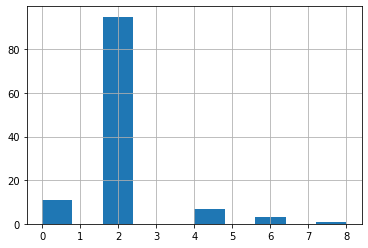

In [ ]:
dota.legs.hist()

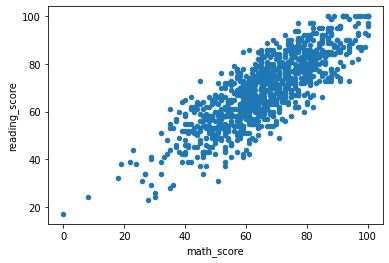

In [ ]:
stud.plot.scatter(x="math_score",y="reading_score")

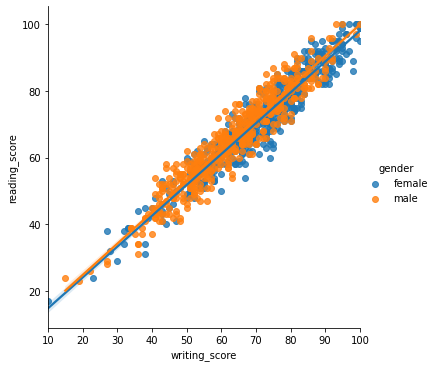

In [ ]:
sns.lmplot(x="writing_score",y="reading_score", data=stud, hue = "gender")

In [ ]:
salary = pd.read_csv("https://stepik.org/media/attachments/course/4852/income.csv")
salary

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


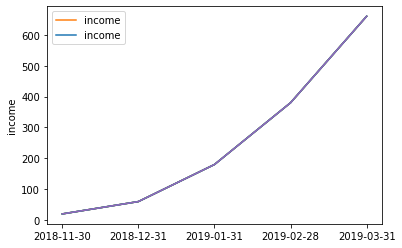

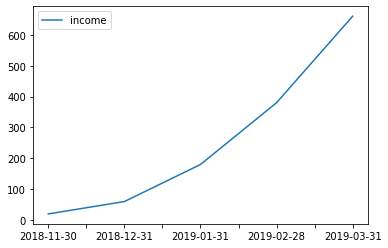

In [ ]:
# все эти строчки дают ОДИНАКОВЫЙ график зарплаты в зависимости от даты
plt.plot(salary.index,salary.income)
salary.income.plot()
sns.lineplot(x = salary.index, y = salary.income)
sns.lineplot(data = salary)
salary['income'].plot()
salary.plot()

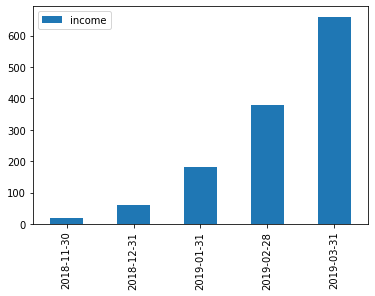

In [ ]:
salary.plot(kind="bar")

In [ ]:
xy_df = pd.read_csv("dataset_209770_6-2.txt",sep=' ')
xy_df

FileNotFoundError: ignored

In [ ]:
sns.lmplot(x='x',y='y',data=xy_df)
sns.scatterplot(xy_df.iloc[:,0],xy_df.iloc[:,1])

NameError: ignored

In [ ]:
spicies = pd.read_csv("https://stepik.org/media/attachments/course/4852/genome_matrix.csv")
spicies

,Unnamed: 0,species0,species1,species2,species3,species4
0,species0,0.536029,0.920292,0.679708,0.840606,0.430842
1,species1,0.920292,0.862417,0.887593,0.769754,0.203214
2,species2,0.679708,0.887593,0.595156,0.003435,0.096052
3,species3,0.840606,0.769754,0.003435,0.458870,0.029251
4,species4,0.430842,0.203214,0.096052,0.029251,0.642109


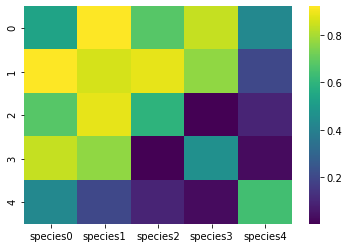

In [ ]:
sns.heatmap(spicies.iloc[:,1:],cmap = "viridis")

In [ ]:
 dota["numb_roles"] = pd.Series([len(x.split(',')) for x in dota.roles])

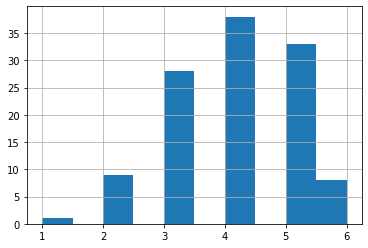

In [ ]:
dota.numb_roles.hist() # какое количество ролей у скольких игроков

 Disabler     83
 Nuker        79
Carry         62
 Escape       46
 Durable      46
 Initiator    42
Support       34
 Pusher       29
 Jungler      15
Initiator     11
 Support       9
Nuker          5
Disabler       3
 Carry         2
Escape         1
Durable        1
dtype: int64

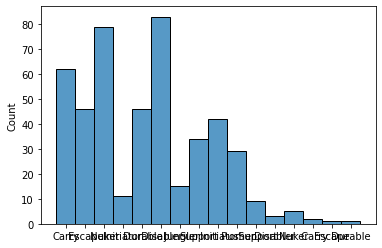

In [ ]:
# какая роль самая распространенная и сколько ролей у скольки игроков
all_roles = []
[all_roles.extend(x.split(',')) for x in dota.roles]
all_roles = [all_roles[i].replace("'","") for i in range(len(all_roles))]
all_roles = [all_roles[i].replace("[","") for i in range(len(all_roles))]
all_roles = [all_roles[i].replace("]","") for i in range(len(all_roles))]
plott = sns.histplot(data = pd.Series(all_roles))
pd.Series(all_roles).value_counts()

# Любимые ирисы

In [ ]:
iris = pd.read_csv("https://stepik.org/media/attachments/course/4852/iris.csv")
iris

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


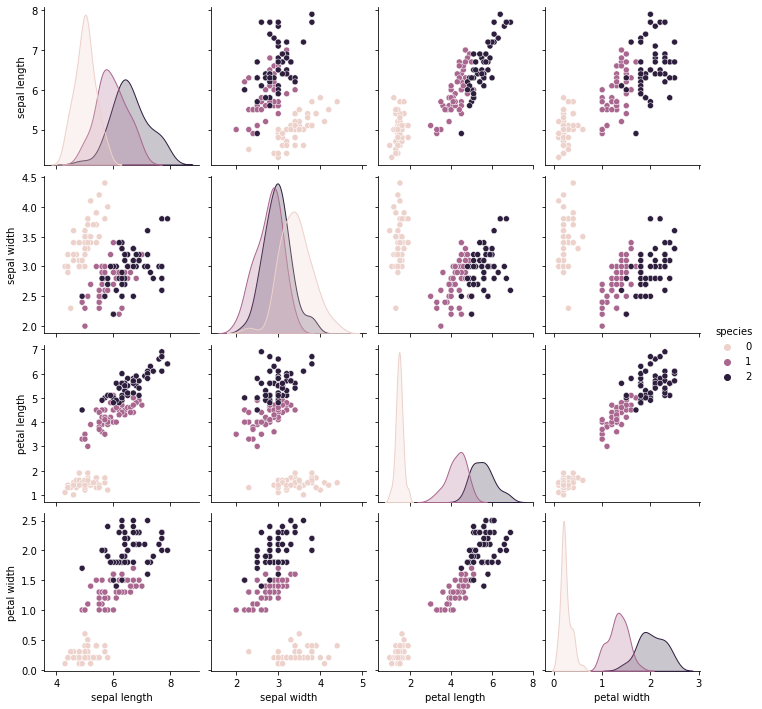

In [ ]:
sns.pairplot(iris.iloc[:,1:], hue = 'species')

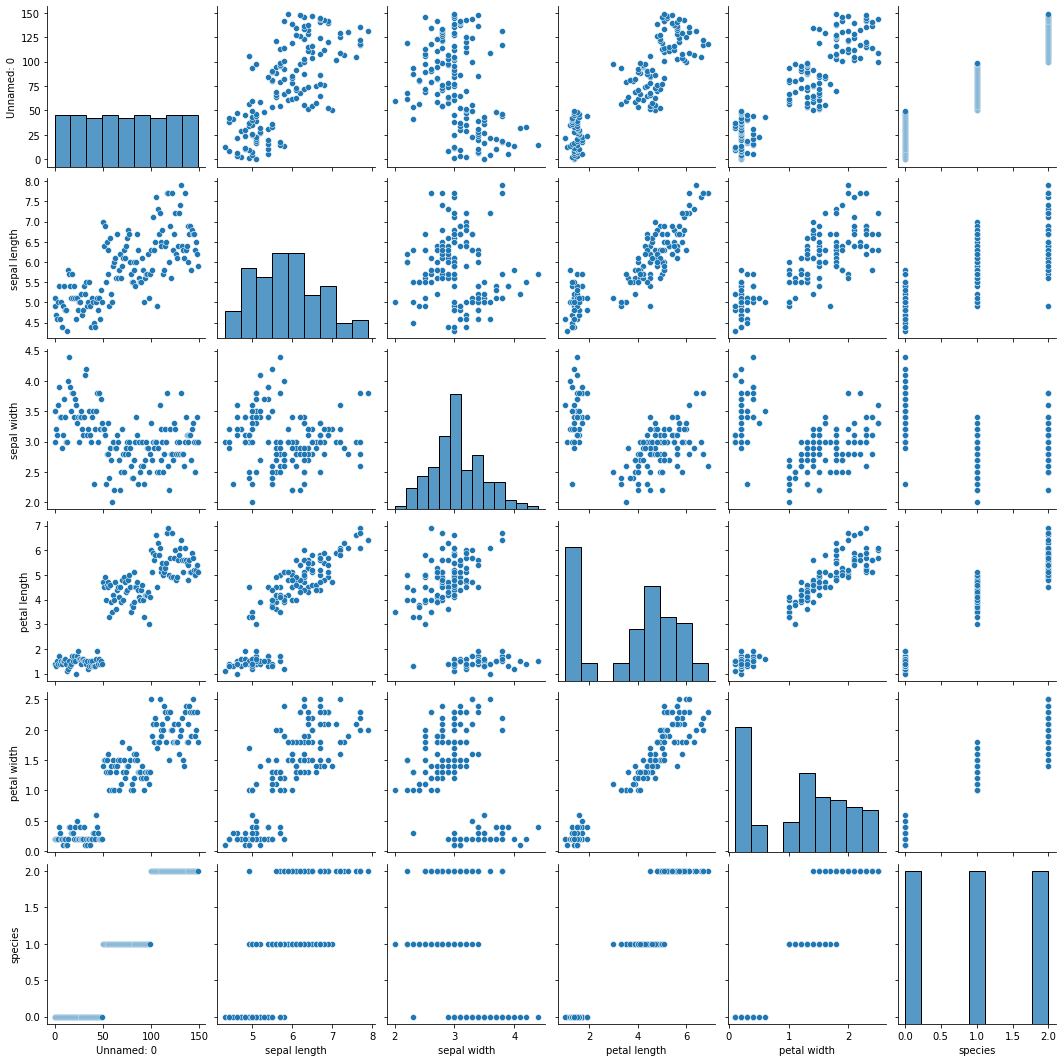

In [ ]:
sns.pairplot(iris)

In [ ]:
iris.describe()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,0.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,37.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,74.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,111.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,149.000000,7.900000,4.400000,6.900000,2.500000,2.000000


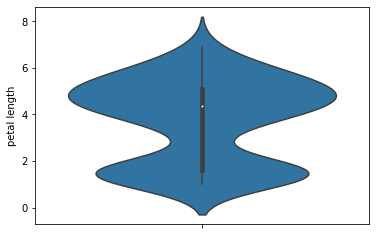

In [ ]:
sns.violinplot(data=iris,y='petal length')

# Замена данных в колонках

In [ ]:
my_stat = pd.read_csv("https://stepik.org/media/attachments/course/4852/my_stat_1.csv")
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,NaN,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [ ]:
# заполнить все NaN значения нулями
my_stat.session_value = my_stat.session_value.fillna(0)
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [ ]:
# медианное значение без учета отрицательных значений (но важно учитывать нули, так как медиана - это про количество значений до и после)
mean_users = my_stat.query("n_users >= 0").n_users.astype(float).median()
mean_users

5.0

In [ ]:
# ЗАМЕНИТЬ столбец по условию в этом же столбце
my_stat.loc[(my_stat.n_users < 0),'n_users']  = mean_users
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,5
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4
8,0.0,8,B,5
9,0.0,9,A,5


In [ ]:
# число наблюдений в каждой группе
iris.groupby('species').count()

,Unnamed: 0,sepal length,sepal width,petal length,petal width
species,,,,,
0,50,50,50,50,50
1,50,50,50,50,50
2,50,50,50,50,50


In [ ]:
mean_session_value_data = my_stat.groupby("group").agg({"session_value":"mean"})
mean_session_value_data = mean_session_value_data.rename(columns = {'session_value':'mean_session_value'})
mean_session_value_data['group'] = ['A','B']
cols = mean_session_value_data.columns.tolist()
cols = cols[-1:] + cols[:-1]
mean_session_value_data = mean_session_value_data[cols]
mean_session_value_data

,group,mean_session_value
group,,
A,A,0.8
B,B,0.8


# Вычисление Карпова в датасете по неизвестному признаку

1 предположение: пользователь с самым большим кол-вом действий (2- сабмитов и просмотров)

для этого возьмем сумму сделанных шагов в теории и практике
и отсортируем id пользователей по этой сумме 

spoiler: предположение верно



In [2]:
events = pd.read_csv("https://stepik.org/media/attachments/course/4852/event_data_train.zip")
subm = pd.read_csv("https://stepik.org/media/attachments/course/4852/submissions_data_train.zip")
subm

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [ ]:
events

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


In [3]:
events_counts = events.groupby('user_id').action.count().sort_values(ascending = False)
subm_counts = subm.groupby('user_id').submission_status.count().sort_values(ascending = False)
subm_counts

user_id
12265    1051
3643      948
1046      934
14454     920
643       888
         ... 
21506       1
21532       1
21554       1
11363       1
6345        1
Name: submission_status, Length: 9940, dtype: int64

In [ ]:
events_counts

user_id
20907    33043
10794    16436
25279    10179
1046      9095
3572      7905
         ...  
16697        2
16682        2
11437        1
8773         1
26502        1
Name: action, Length: 19234, dtype: int64

In [4]:
counts = pd.concat([events_counts, subm_counts], axis=1, ignore_index=True)
counts['sum']= counts[0]+counts[1]
counts.sort_values('sum',ascending = False).head(1)
# предположение верно! ответ = Анатолий Карпов user_id = 1046

,0,1,sum
user_id,,,
1046,9095,934.0,10029.0


# Техническое собеседование Карпова (стрим на ютубе)

In [ ]:
l = [1,2,3,4,5]
# 3 способа вывести обращенный список
print(l[::-1])
print(reversed(l))
for i in reversed(range(len(l))):
  print(l[i])

[5, 4, 3, 2, 1]
5
4
3
2
1


In [ ]:
# вывести все варианты значения столбца
dota.attack_type.unique()

array(['Melee', 'Ranged'], dtype=object)

In [ ]:
# отобрать топ 5 по использованию сообщений (в моем случае по правильным сабмитам)
subm[subm.submission_status == "correct"].groupby('user_id').submission_status.count().sort_values(ascending = False).head(5)
subm[subm.submission_status == "correct"].groupby('user_id').agg({'submission_status':'count'}).sort_values(by = 'submission_status',ascending = False).head(5)

,submission_status
user_id,
1046,421
5552,186
17135,168
6183,142
8461,135


In [ ]:
# какой самый популярный раздел у тех, кто не пользуется лентой (feed)
# перееиначим, какой самый популярный ход у тех, кто ни разу ни passed
events.action.unique()
events[events.action != 'passed'].groupby('user_id') \
                                 .action.value_counts() \
                                 .sort_values(ascending = False)
# ответ - viewed, но решение неверно, тк тут мы не выкинули всех, у кого есть passed,
# а только выкинули эти их шаги !!

user_id  action         
20907    viewed             32778
10794    viewed             16089
25279    viewed              9693
1046     viewed              8122
3572     viewed              6968
                            ...  
12496    viewed                 1
12497    started_attempt        1
12500    discovered             1
         viewed                 1
1        discovered             1
Name: action, Length: 49853, dtype: int64

In [ ]:
grev = events.groupby('user_id').action.apply(list)
#ev = pd.DataFrame({'all': grev, 'user_id': range(1,grev.shape[0]+1)})
all_acts = []
[all_acts.extend(i) for i in list(grev) if 'passed' not in i]
pd.Series(all_acts).value_counts()
# чаще всего у тех, кто не решает шаги, встречается viewed
#len(all_acts) = 6842 (столько строк действий у пользователей, которые не решили ни одного шага)

viewed             3942
discovered         2116
started_attempt     784
dtype: int64

In [ ]:
# еще одно решение = предыдущей ячейке, результат тот же. Тут берем в датасет всех, кто имеет хоть один passed
# и берем все строки не от этих пользователей, потом считаем сколько и каких у них шагов
users_passed = events[events.action == 'passed'].user_id.drop_duplicates()
users_without_passed = events[~events.user_id.isin(users_passed)]
users_without_passed.action.value_counts()

viewed             3942
discovered         2116
started_attempt     784
Name: action, dtype: int64

In [ ]:
# какой пользователь дольше всех пользовался курсом
# надо сгруппировать все даты шагов, сделать разницы первых и последних, взять макс
# похожая задача была в курсе Карпова в 1 модуле
times = events.groupby('user_id').timestamp.apply(list)
# print(times.index) - поле index у объекта Series - список индексов серии, в данном случае user_id
max = 0
index = 0
m = 0
for i in times:
  new = i[len(i)-1] - i[0]
  if new > max:
    max = new
    index = times.index[m]
  m+=1
print(max/(60*60*24*365), ' user_id = ', index)
# какой-то пользователь 2.9 года ходил по шагам (наверняка Карпов(нет, не Карпов, 4614))
# 4614 - это номер строки ответа, но не user_id, тк многие user_id мы выкинули
# если не порядковый номер, а элемент списка times.index этой строки, получим верный ответ == 6369

2.917089897260274  user_id =  6369


In [ ]:
# еще одно решение поиска самого долгоиграющего пользователя
diff = events.groupby('user_id').timestamp.max() - events.groupby('user_id').timestamp.min()
print(diff.max() / (60*60*24*365), ' user_id = ',diff[diff == diff.max()].index[0])

2.917089897260274  user_id =  6369


In [ ]:
# ручная проверка пользователя 6369
print(events[events.user_id == 6369])
(1526343647 - 1434350300) / (60*60*24*365)

         step_id   timestamp      action  user_id
2585       32815  1434350300  discovered     6369
2586       32815  1434350300      viewed     6369
2587       32815  1434350300      passed     6369
2605       32811  1434350321      viewed     6369
2606       32811  1434350321  discovered     6369
...          ...         ...         ...      ...
715227     32198  1442233944      viewed     6369
715261     32198  1442235191      viewed     6369
715264     32198  1442238732      viewed     6369
716169     32198  1442325022      viewed     6369
3462185    33334  1526343647      viewed     6369

[1194 rows x 4 columns]


2.917089897260274

## Визуализации

### Сколько времени проводят ученики проводят в курсе (от начала и до конца)

Большинство заканчивает курс или бросает за 10 дней и меньше


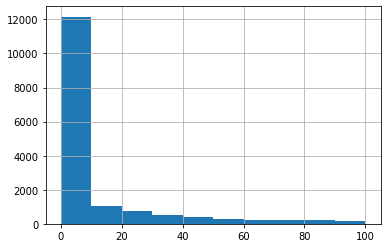

In [ ]:
diff_in_days = (diff / (60*60*24))
diff_in_days[diff_in_days < 100].hist()

print("Большинство заканчивает курс или бросает за 10 дней и меньше")

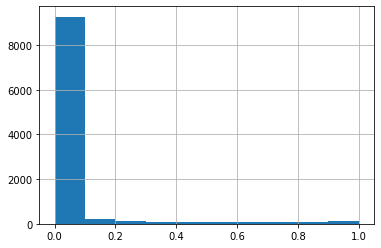

In [ ]:
diff_in_days[diff_in_days < 1].hist()
print("Большинство заканчивает курс или бросает его меньше чем за полдня (видимо, бросают)")

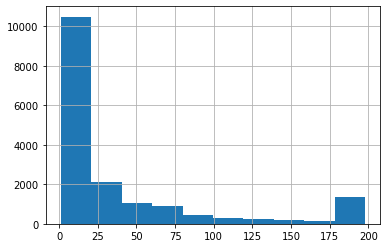

In [ ]:
events[events.action == 'passed'].groupby('user_id').action.count().hist()

In [ ]:
print(events[events.action == 'passed'].groupby('user_id').action.count().min(),
      events[events.action == 'passed'].groupby('user_id').action.count().max())

1 198


In [ ]:
events['date'] = pd.to_datetime(events.timestamp, unit = 's')
events['indays'] = events.timestamp/(60*60*24*365) - 45
events

,step_id,timestamp,action,user_id,date,indays
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,0.482650
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,0.482650
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,0.482650
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,0.482651
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,0.482651
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,3.413644
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,3.413646
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,3.413646
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,3.413646


In [ ]:
events.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


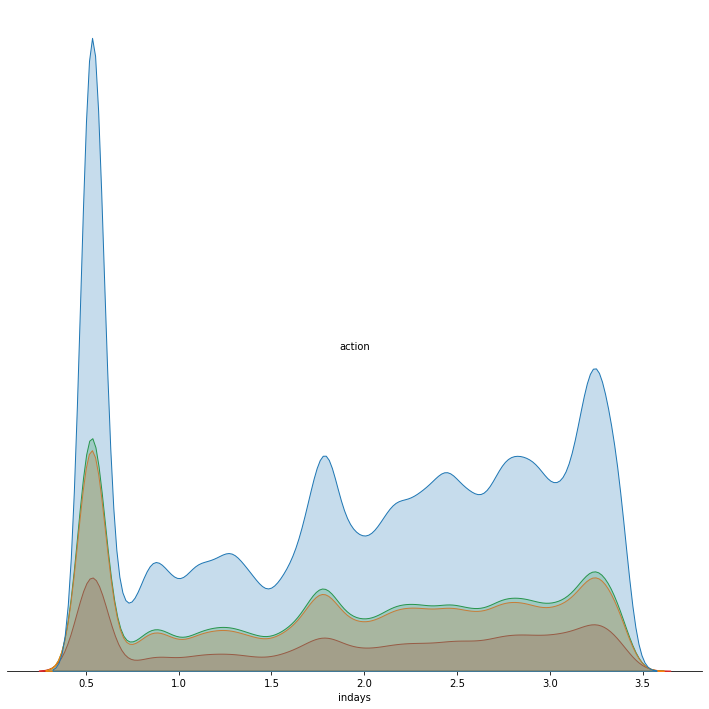

In [ ]:
g = sns.pairplot(events[['action','indays']],hue = 'action',corner=True,size=10)
#g._legend.set_bbox_to_anchor((0.5, 0.5))
# легенда не видна....
# на графике распределение действий пользователей за три года: 'viewed', 'passed', 'discovered', 'started_attempt'

# Дерево решений на ирисах

In [ ]:
iris_train = pd.read_csv("https://stepik.org/media/attachments/course/4852/train_iris.csv")

iris_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/test_iris.csv")

In [ ]:
iris_train

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...,...
95,147,6.5,3.0,5.2,2.0,2
96,124,6.7,3.3,5.7,2.1,2
97,123,6.3,2.7,4.9,1.8,2
98,146,6.3,2.5,5.0,1.9,2


In [ ]:
X_train = iris_train[["sepal length", "sepal width","petal length","petal width"]]
y_train = iris_train["species"]
X_test = iris_test[["sepal length", "sepal width","petal length","petal width"]]
y_test = iris_test["species"]

In [ ]:
all_depths = range(1,101) # X на график
all_scores = pd.DataFrame({'train_score':[], 'test_score':[]})
np.random.seed(0)
for depth in all_depths:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = depth)
    clf.fit(X_train, y_train)
    all_scores.loc[depth-1,'train_score'] = clf.score(X_train, y_train)
    all_scores.loc[depth-1,'test_score'] = clf.score(X_test, y_test)

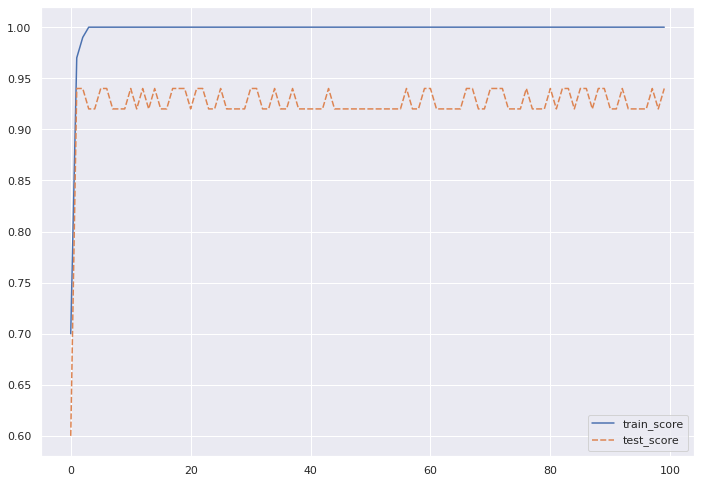

In [ ]:
sns.lineplot(data=all_scores)

## Кошки и собаки

In [ ]:
dcats = pd.read_csv("https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv")
dcats
dcats_test = pd.read_json("dataset_209691_15-1.txt")

In [ ]:
dcats_test

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,0,0
1,31,37.2,1,1,0
2,31,37.2,1,1,0
3,28,33.6,1,1,0
4,27,32.4,0,1,0
...,...,...,...,...,...
95,6,2.4,1,0,1
96,9,3.6,1,0,1
97,13,5.2,1,0,1
98,7,2.8,1,0,1


In [ ]:
dcats[dcats['Лазает по деревьям'] == 0]
dcats[dcats['Длина'] >= 14.5].Вид.unique() # предсказание с 100% точностью с делением по длине 14.5, 
# возможно поэтому точность = 1 постоянно
dcats[dcats['Высота'] >= 11.8].Вид.unique() # предсказание с 100% точностью с делением по высоте 11.8, 
# возможно поэтому точность = 1 постоянно


# путаю данные, чтобы коты и собаки хоть немного были похожи::!! тогда точность начинает отличаться при разных глубинах дерева
dcats.loc[dcats.Вид == 'котик','Длина'] = dcats['Длина'] + 5
dcats.loc[dcats.Вид == 'котик','Высота'] = dcats['Высота'] + 20


In [ ]:
dcats

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,13,23.2,1,0,1,котик
996,12,22.8,1,0,1,котик
997,11,22.4,1,0,1,котик
998,12,22.8,1,0,1,котик


In [ ]:
X = dcats[["Длина", "Высота","Шерстист","Гавкает","Лазает по деревьям"]]
y = dcats["Вид"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

all_depths = range(1,101) # X на график
all_scores = pd.DataFrame({'train_score':[], 'test_score':[], 'val_score':[]})
np.random.seed(0)

for depth in all_depths:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = depth)
    clf.fit(X_train, y_train)
    all_scores.loc[depth-1,'train_score'] = clf.score(X_train, y_train)
    all_scores.loc[depth-1,'test_score'] = clf.score(X_test, y_test)
    all_scores.loc[depth-1,'val_score'] = cross_val_score(clf,X_train,y_train, cv = 5).mean()


In [ ]:
#answer = list(clf.predict(dcats_test)).count('собачка')
#answer

43

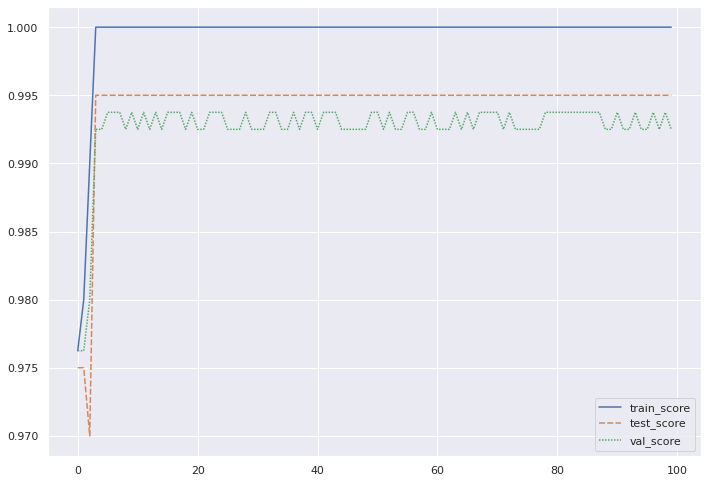

In [ ]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.lineplot(data=all_scores)

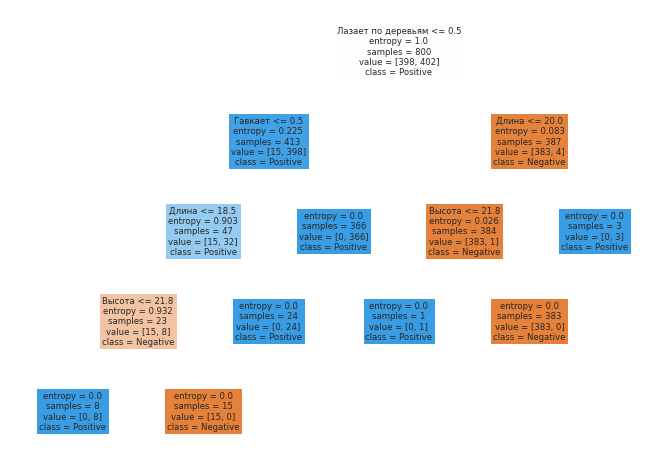

In [ ]:
#fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names= list(X),  
                   class_names= ['Negative','Positive'],
                   filled=True)

# Precision на датасете Песен

In [ ]:
songs = pd.read_csv("https://stepik.org/media/attachments/course/4852/songs.csv") 
songs

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3
...,...,...,...,...,...,...,...,...,...,...
355,just-like-that,2006,abba,Pop,Until that day\nMy life had been a river\nFoll...,972,2,0,0,1
356,ring-ring,1995,abba,Pop,I was sitting by the phone\nI was waiting all ...,1283,33,0,0,3
357,reina-danzante,1981,abba,Pop,You can dance\nYou can jive\nHaving the time o...,810,1,0,0,0
358,code-of-the-streets,2006,gangstarr,Hip-Hop,Take this for example young brothers want rep\...,1996,34,0,0,5


In [ ]:
for i in songs.columns:
  if i != 'lyrics':
    songs[i].unique()
songs['artist'].unique()

array(['gangstarr', 'blind-guardian', 'abba'], dtype=object)

In [ ]:
# label-encoding - замена строк на числа

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(songs.artist)
songs.artist = le.transform(songs.artist)

le2 = preprocessing.LabelEncoder()
le2.fit(songs.genre)
songs.genre = le2.transform(songs.genre)

#songs.artist = le.inverse_transform(songs.artist) 
#songs.genre = le2.inverse_transform(songs.genre) 


In [ ]:
songs

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,2,0,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,1,1,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,1,1,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,1,1,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,2,0,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3
...,...,...,...,...,...,...,...,...,...,...
355,just-like-that,2006,0,2,Until that day\nMy life had been a river\nFoll...,972,2,0,0,1
356,ring-ring,1995,0,2,I was sitting by the phone\nI was waiting all ...,1283,33,0,0,3
357,reina-danzante,1981,0,2,You can dance\nYou can jive\nHaving the time o...,810,1,0,0,0
358,code-of-the-streets,2006,2,0,Take this for example young brothers want rep\...,1996,34,0,0,5


In [ ]:
y = songs["artist"]
X = songs.drop(["artist","song","lyrics"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state=0)

In [ ]:
X

,year,genre,length,commas,exclamations,colons,hyphens
0,2007,0,1300,24,5,0,11
1,2006,1,1566,0,0,0,0
2,2006,1,996,1,0,1,0
3,2015,1,2868,5,0,0,0
4,2014,0,3351,22,0,0,3
...,...,...,...,...,...,...,...
355,2006,2,972,2,0,0,1
356,1995,2,1283,33,0,0,3
357,1981,2,810,1,0,0,0
358,2006,0,1996,34,0,0,5


In [ ]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

In [ ]:
#print(precision_score(y_true = y_test, y_pred = y_predicted, average = 'weighted'))
precision = precision_score(y_true = y_test, y_pred = y_predicted, average = 'micro')
precision

1.0


1.0

# Предсказание болезни сердца Деревом решений

In [ ]:
heart_ill = pd.read_csv("https://stepik.org/media/attachments/course/4852/train_data_tree.csv")
heart_ill

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1
...,...,...,...
233,1,0,0
234,1,1,0
235,1,0,1
236,1,1,1


## Автоматизация ДР (КроссВ + отбор параметров)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = tree.DecisionTreeClassifier()

params = {'criterion': ['entropy'], 'max_depth': range(1,20)}
auto_clf = GridSearchCV(clf, params, cv = 5)

In [ ]:
X = heart_ill[['sex','exang']]
y = heart_ill['num']

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)

#auto_clf.fit(X_train, y_train)
auto_clf.fit(X, y)
auto_clf.best_params_

{'criterion': 'entropy', 'max_depth': 1}

In [ ]:
new_clf = auto_clf.best_estimator_

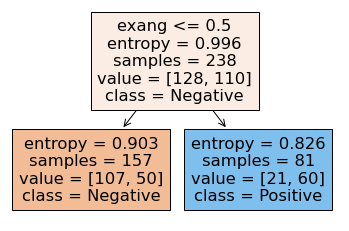

In [ ]:
_ = tree.plot_tree(new_clf, 
                   feature_names= list(X),  
                   class_names= ['Negative','Positive'],
                   filled=True)

In [ ]:
# Энтропия для начала = 0.99, чтобы получить ее нужно получить энтропию системы = сумма p*log(p)
import math
#entr_syst = - (y_train[y_train == 1].count() / y_train.count())*math.log2(y_train[y_train == 1].count() / y_train.count()) -\
#(y_train[y_train == 0].count() / y_train.count())*math.log2(y_train[y_train == 0].count() / y_train.count())

In [ ]:
# Information gain = E(Y) - n1/N*E(Y/x1) - n2/N*E(Y/x2)
entr_syst = 0.996
Inf_gain = entr_syst - 157/238*0.903 - 81/238*0.826
print(entr_syst, Inf_gain)
# чтобы по красоте, надо пользоваться:
# 0 - индекс корня
# 0 - индекс корня
# l_node = clf.tree_.children_left[0] # индекс корня левого поддерева
# n1 = clf.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
# e1 = clf.tree_.impurity[l_node] # энтропия в корне левого поддерева

# КЛАВИШИ CTRL+/ КОММЕНТИРУЮТ ВЫДЕЛЕННЫЙ КУСОК КОДА В НЕСКОЛЬКО СТРОК

0.996 0.11920588235294122


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

clf = tree.DecisionTreeClassifier()
auto = GridSearchCV(clf, {'max_depth':range(1,11), 'min_samples_split':range(2,11), 'min_samples_leaf':range(2,11)}, cv = 5)

best_tree = auto.fit(X, y).best_estimator_

In [ ]:
auto.best_params_

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}

# Найти самый проблемный практический шаг в Степиковских данных


## Неверное решение

ищет самые обширные по уходам и по последним неверным шагам шаги, но не проверяет, что там одни и те же люди

In [104]:
subm

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [139]:
dt_last_wrong = subm[subm.submission_status == 'wrong'].groupby('user_id') \
                .last().groupby('step_id') \
                .count().sort_values('timestamp',ascending = False)
# 7765 = количество последних неверных шагов у пользователей, проверка, на то что следующими измененениями
# я ничего не теряю, тоже 7765 остается. Но выводим кол-во timestamp-ов (по факту кол-во пользователей) для каждого оставшегося шага
# проверка = subm[subm.submission_status == 'wrong'].groupby('user_id').last().shape
dt_last_wrong

,timestamp,submission_status
step_id,,
32812,1525,1525
120745,791,791
32219,534,534
34041,532,532
31978,374,374
...,...,...
32089,2,2
33480,2,2
33332,1,1


In [140]:
# также уточним, что этот последний неверный шаг был последним у этого человека, он же мог что-то пропустить и дальше
# правильно решать
dt_last_step = pd.DataFrame()
dt_last_step['user_id'] = subm.groupby('user_id').step_id.last().index
dt_last_step['step_id'] = subm.groupby('user_id').step_id.last()
dt_last_step

,user_id,step_id
0,2,NaN
1,3,NaN
2,5,32929.0
3,8,33540.0
4,14,NaN
...,...,...
9935,26787,NaN
9936,26790,120745.0
9937,26794,NaN
9938,26797,32929.0


In [141]:
dt_last_step = dt_last_step.dropna()
dt_last_step = dt_last_step.astype({"step_id": "Int64"})
dt_last_step.index = dt_last_step.step_id
dt_last_step = dt_last_step.drop('step_id',axis =1)
dt_last_step #для каждого шага все пользователи, которые на нем закончили

,user_id
step_id,
32929,5
33540,8
32929,16
120745,25
33983,37
...,...
34041,26776
120745,26778
120745,26779


In [142]:
dt_last_step_num = dt_last_step.groupby('step_id').user_id.count() \
                  .sort_values(ascending = False) \
                  #
dt_last_step_num.head()

step_id
120745    1675
32929     1455
34041      240
33540       57
32219       35
Name: user_id, dtype: int64

In [143]:
dt_last_wrong = dt_last_wrong.merge(dt_last_step_num, on = 'step_id', how = 'outer')

In [144]:
dt_last_wrong = dt_last_wrong.rename(columns={"user_id":"user_num_last", "timestamp":"user_num_last_wrong"})
dt_last_wrong = dt_last_wrong.dropna().drop('submission_status',axis=1).sort_values(by = 'user_num_last_wrong',ascending = False)
dt_last_wrong.head()

,user_num_last_wrong,user_num_last
step_id,,
32812,1525,21.0
120745,791,1675.0
32219,534,35.0
34041,532,240.0
31978,374,5.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f082e870d90>,
      dtype=object)

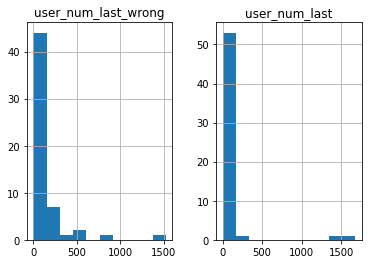

In [145]:
dt_last_wrong.hist()

## Верное решение

In [175]:
# последний по времени шаг у каждого пользователя
last_steps = pd.DataFrame(subm.sort_values(by = 'timestamp',ascending = False). \
                                    groupby('user_id') \
                                    .step_id.first()).rename(columns = {"step_id":"last_step_id"})
last_status = pd.DataFrame(subm.sort_values(by = 'timestamp',ascending = False). \
                                    groupby('user_id') \
                                    .submission_status.first())     
last_steps.merge(last_status, on = 'user_id') \
                      .query("submission_status == 'wrong'") \
                      .groupby("last_step_id").count() \
                      .sort_values(by = "submission_status", ascending = False) \
                      .rename(columns = {"submission_status":"num_of_users"})
                           
# верный ответ = шаг 31978, он тоже был в прошлом варианте, но самым незначительным, только 5 ушедших почему-то
# теперь видно, что их 154. И проблема была в том, что не было учета тот ли пользователь неверен, кто и последний раз зашел

,num_of_users
last_step_id,
31978,154
32812,133
32031,97
32202,92
33481,78
...,...
33482,1
33686,1
33684,1
